In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime

from tqdm.notebook import tqdm
from scipy import  stats

In [2]:
data = pd.read_csv('STORAGE_data/es-1min_FULL.csv')
normal_datetime = data
normal_datetime.index = pd.to_datetime(normal_datetime.date + ' ' + normal_datetime.time)

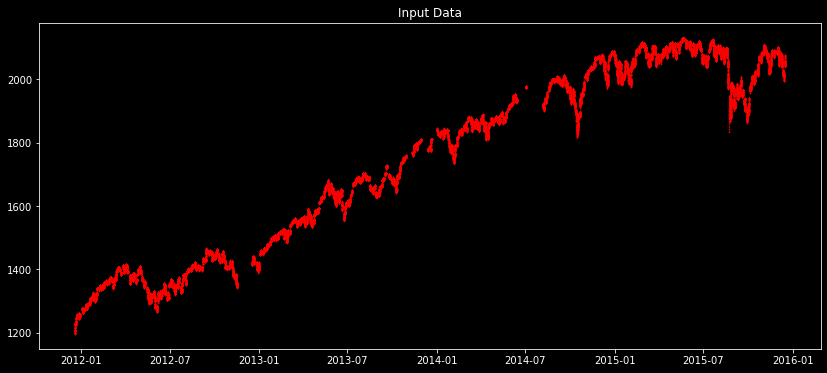

In [3]:
plt.style.use('dark_background')
plt.figure(figsize=(14,6))
plt.title('Input Data')
plt.plot(normal_datetime.open, 'o', markersize=.3, alpha=.7, color='red')
plt.show()

In [4]:
data = normal_datetime['2012-01': '2013-09'].resample('1H').first()

In [5]:
def CREATE_PNL(normal_datetime, X_THRESHOLD):
    MONEY = 100_000

    BOUHT_DATE = []
    MONEY_DATE = []
    start_carette = 40_000
    end_carette = normal_datetime.shape[0] // 1
    for _ in tqdm(normal_datetime.index[start_carette:end_carette], total=end_carette - start_carette):
        try:
            if (normal_datetime.loc[_, 'time'] == '14:30:00') and (normal_datetime.loc[_, 'open'].astype(str) != 'nan'):
                today_data = normal_datetime.loc[_, :]
                #back_index = _ - pd.DateOffset(days=1, minutes=5) + pd.DateOffset(hours=1)
                back_index = _ - pd.DateOffset(days=1) + pd.DateOffset(minutes=28)
                data_back = normal_datetime.loc[back_index, :]
                if str(data_back.close) != 'nan':
                    if (today_data.open / data_back.close) - 1 > X_THRESHOLD:
                        # print(today_data)
                        # print(data_back)
                        # print('------')

                        #MONEY = (MONEY / today_data.open) * normal_datetime.loc[_ + pd.DateOffset(hours=1) - pd.DateOffset(minutes=1), :].close
                        MONEY = (MONEY / today_data.open) * normal_datetime.loc[_ + pd.DateOffset(minutes=28), :].close
                        MONEY_DATE.append(MONEY)
                        BOUHT_DATE.append(today_data.date)

                    if (today_data.open / data_back.close) - 1 < -1 * X_THRESHOLD:
                        #MONEY = (2 * MONEY) - ((MONEY / today_data.open) * normal_datetime.loc[_ + pd.DateOffset(hours=1) - pd.DateOffset(minutes=1), :].close)
                        MONEY = (2 * MONEY) - ((MONEY / today_data.open) * normal_datetime.loc[_ + pd.DateOffset(minutes=28), :].close)
                        MONEY_DATE.append(MONEY)
                        BOUHT_DATE.append(today_data.date)
        except KeyError:
            pass
        except ValueError:
            if (str(normal_datetime.loc[_, 'time'][:1]) == '14:30:00') and (normal_datetime.loc[_, 'open'][:1].astype(str) != 'nan'):
                today_data = normal_datetime.loc[_, :]
                #back_index = _ - pd.DateOffset(days=1, minutes=5) + pd.DateOffset(hours=1)
                back_index = _ - pd.DateOffset(days=1) + pd.DateOffset(minutes=28)
                data_back = normal_datetime.loc[back_index, :]
                if str(data_back.close) != 'nan':
                    if (today_data.open / data_back.close) - 1 > X_THRESHOLD:
                        # print(today_data)
                        # print(data_back)
                        # print('------')

                        #MONEY = (MONEY / today_data.open) * normal_datetime.loc[_ + pd.DateOffset(hours=1) - pd.DateOffset(minutes=1), :].close
                        MONEY = (MONEY / today_data.open) * normal_datetime.loc[_ + pd.DateOffset(minutes=28), :].close
                        MONEY_DATE.append(MONEY)
                        BOUHT_DATE.append(today_data.date)


                    if (today_data.open / data_back.close) - 1 < -1 * X_THRESHOLD:
                        #MONEY = (2 * MONEY) - ((MONEY / today_data.open) * normal_datetime.loc[_ + pd.DateOffset(hours=1) - pd.DateOffset(minutes=1), :].close)
                        MONEY = (2 * MONEY) - ((MONEY / today_data.open) * normal_datetime.loc[_ + pd.DateOffset(minutes=28), :].close)
                        MONEY_DATE.append(MONEY)
                        BOUHT_DATE.append(today_data.date)
    plt.style.use('dark_background')
    plt.figure(figsize=(14,6))
    plt.title(f"PNL FOR X_THRESHOLD:{X_THRESHOLD * 100} %")
    plt.plot([pd.to_datetime(_) for _ in BOUHT_DATE], MONEY_DATE, markersize=.3, alpha=.7, color='red')
    plt.show()
    return [BOUHT_DATE, MONEY_DATE]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/220368 [00:00<?, ?it/s]

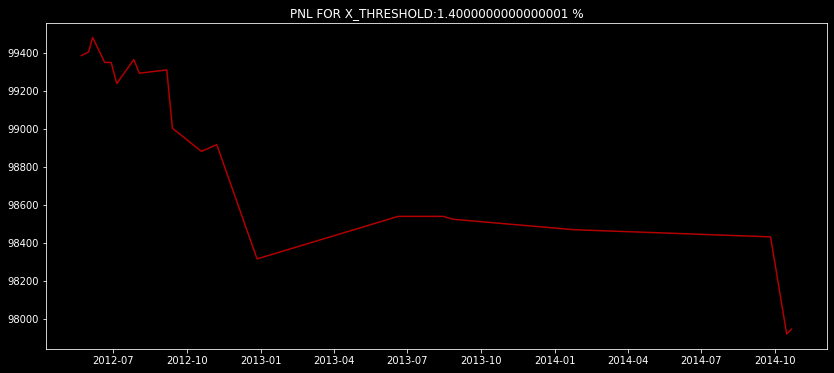

In [12]:
RESULT = list()
#TH_ARRAY = np.arange(.001, .02, .005)
TH_ARRAY = [0.014]
for X_TH in tqdm(TH_ARRAY):
    RESULT.append(CREATE_PNL(normal_datetime[:int(len(normal_datetime) // 1.5)], X_TH))

In [ ]:
finall_result = [[TH_ARRAY[i], _] for i, _ in enumerate(RESULT)]

In [ ]:
for _ in finall_result[:]:
    money = np.array(_[1][1])
    rets = [(money[_]/money[_ - 1] - 1) for _ in range(1, len(money))]
    SHARPE_RATIO = np.mean(rets) / np.std(rets)
    print(f"FOR THRESHOLD = {_[0] * 100} % SHARPE_RATIO = {SHARPE_RATIO}")

In [32]:
normal_datetime.reset_index()[1470:1580]

,index,date,time,open,high,low,close
1470,2011-12-22 14:30:00,12/22/2011,14:30:00,1248.875,1248.875,1248.625,1248.625
1471,2011-12-22 14:31:00,12/22/2011,14:31:00,1248.625,1248.625,1248.625,1248.625
1472,2011-12-22 14:32:00,12/22/2011,14:32:00,1248.625,1248.875,1248.625,1248.875
1473,2011-12-22 14:33:00,12/22/2011,14:33:00,1248.875,1248.875,1248.625,1248.625
1474,2011-12-22 14:34:00,12/22/2011,14:34:00,1248.625,1249.125,1248.625,1248.875
...,...,...,...,...,...,...,...
1575,2011-12-23 09:45:00,12/23/2011,9:45:00,1250.375,1250.375,1249.875,1250.375
1576,2011-12-23 09:46:00,12/23/2011,9:46:00,1250.375,1250.625,1250.125,1250.375
1577,2011-12-23 09:47:00,12/23/2011,9:47:00,1250.375,1250.875,1250.375,1250.875
1578,2011-12-23 09:48:00,12/23/2011,9:48:00,1250.875,1251.125,1250.625,1250.625


,date,time,open,high,low,close
2011-12-19 09:30:00,12/19/2011,9:30:00,1215.875,1216.375,1215.625,1215.875
2011-12-19 09:31:00,12/19/2011,9:31:00,1215.875,1217.125,1215.875,1217.125
2011-12-19 09:32:00,12/19/2011,9:32:00,1217.125,1217.875,1217.125,1217.625
2011-12-19 09:33:00,12/19/2011,9:33:00,1217.625,1218.375,1217.625,1218.125
2011-12-19 09:34:00,12/19/2011,9:34:00,1218.125,1218.375,1217.625,1217.875
...,...,...,...,...,...,...
2015-12-16 16:10:00,12/16/2015,16:10:00,2070.125,2070.375,2069.875,2070.125
2015-12-16 16:11:00,12/16/2015,16:11:00,2070.125,2070.875,2069.125,2069.250
2015-12-16 16:12:00,12/16/2015,16:12:00,2069.250,2072.125,2069.125,2072.125
2015-12-16 16:13:00,12/16/2015,16:13:00,2072.125,2072.625,2071.625,2072.000


In [34]:
idx = [1470 * i for i in range(1, int(normal_datetime.shape[0] // 1470))]

[1470,
 2940,
 4410,
 5880,
 7350,
 8820,
 10290,
 11760,
 13230,
 14700,
 16170,
 17640,
 19110,
 20580,
 22050,
 23520,
 24990,
 26460,
 27930,
 29400,
 30870,
 32340,
 33810,
 35280,
 36750,
 38220,
 39690,
 41160,
 42630,
 44100,
 45570,
 47040,
 48510,
 49980,
 51450,
 52920,
 54390,
 55860,
 57330,
 58800,
 60270,
 61740,
 63210,
 64680,
 66150,
 67620,
 69090,
 70560,
 72030,
 73500,
 74970,
 76440,
 77910,
 79380,
 80850,
 82320,
 83790,
 85260,
 86730,
 88200,
 89670,
 91140,
 92610,
 94080,
 95550,
 97020,
 98490,
 99960,
 101430,
 102900,
 104370,
 105840,
 107310,
 108780,
 110250,
 111720,
 113190,
 114660,
 116130,
 117600,
 119070,
 120540,
 122010,
 123480,
 124950,
 126420,
 127890,
 129360,
 130830,
 132300,
 133770,
 135240,
 136710,
 138180,
 139650,
 141120,
 142590,
 144060,
 145530,
 147000,
 148470,
 149940,
 151410,
 152880,
 154350,
 155820,
 157290,
 158760,
 160230,
 161700,
 163170,
 164640,
 166110,
 167580,
 169050,
 170520,
 171990,
 173460,
 174930,
 17

In [ ]:
normal_datetime.reset_index().loc[idx,:]